**ShAI BootCamp Assignment - Maher Alhashem**

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [217]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('./Salaries.csv')
df.head(1)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [218]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## **1. Basic Data Exploration**



*   We have 13 columns and 148654 rows in our "Salaries" Dataset.
*   Columns Data type are shown in output.

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


*   Examine each column for any missing values




In [220]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## **2. Descriptive Statistics**



*   Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

***in the output:***

*   mean = average
*   50% = median
*   min = minimum salary
*   max = maximum salary
*   std = standard deviation

In [221]:
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

*   mode is (0.0)

In [222]:
df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

*   The Range of Salaries = maximum value - minimum value





In [223]:
print('Range of salaries = ' + str(df['TotalPay'].max() - df['TotalPay'].min()))

Range of salaries = 568213.56


## **3. Data Cleaning:**

Handle missing data by suitable method with explain why you use it.

*   we droped "Notes" & "Status" Columns because it does not contain any information
*   we replace NaN values in "BasePay", "OvertimePay", "OtherPay" & "Benefits" columns cause we don't want to get Illogical data in "TotalPay" column.



In [224]:
df.drop("Notes",axis=1,inplace=True)
df.drop("Status",axis=1,inplace=True)
updated_df = df
updated_df['Benefits']=updated_df['Benefits'].fillna(0)
updated_df['BasePay']=updated_df['BasePay'].fillna(0)
updated_df['OvertimePay']=updated_df['OvertimePay'].fillna(0)
updated_df['OtherPay']=updated_df['OtherPay'].fillna(0)

*   Examine each column for any missing values

In [225]:
updated_df.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

## **4. Basic Data Visualization:**

Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

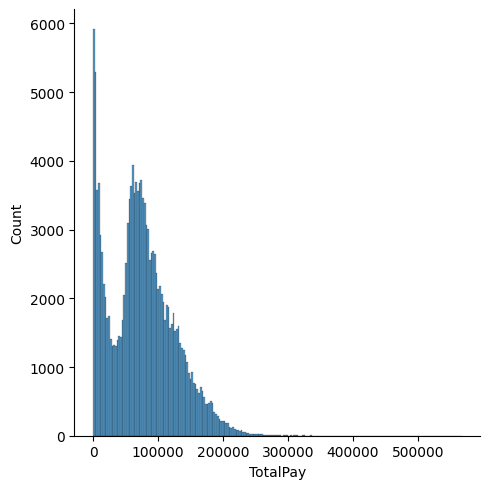

In [206]:
sns.displot(pd.DataFrame(updated_df), x='TotalPay')

*   Pie Chart: We identified the department through the column "JobTitle", and found that the partition names are not uniform.



In [227]:
updated_df["Department"] = np.nan

for idx in updated_df.index:
  s = updated_df['JobTitle'][idx]
  start = s.find('(')
  if start != -1:
    end = s.find(')', start)
    updated_df["Department"][idx] = s[start+1:end]


<ipython-input-227-eaa595c377f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df["Department"][idx] = s[start+1:end]


In [228]:
for idx in updated_df.index:
  s = updated_df['Department'][idx]
  if s in ('Civil/Criminal','CIVIL/CRIMINAL','Civil & Criminal','CIVIL & CRIMINAL','Cvl&Crmnl'):
    updated_df['Department'][idx] = 'Civil/Criminal Department'
  elif s in ('POLICE DEPARTMENT','Police Department'):
    updated_df['Department'][idx] = 'Police Department'
  elif s in ('Seasonal','SEASONAL'):
    updated_df['Department'][idx] = 'Seasonal'
  elif s in ('Fire Dept','Fire Department','FIRE DEPARTMENT'):
    updated_df['Department'][idx] = 'Fire Department'

<Axes: ylabel='Department'>

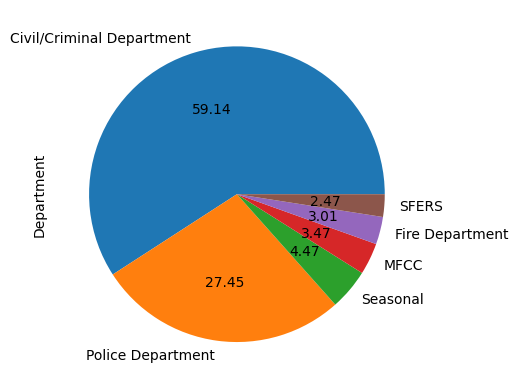

In [229]:
updated_df['Department'].dropna().value_counts().plot(kind='pie', autopct='%.2f')

## **5. Grouped Analysis:**

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.



*   By arranging the 'Total Pay' and 'Year' columns, we obtain summary statistics for every year by describe().




In [230]:
fgf_sf = updated_df[['TotalPay','Year']]
new_table = df.pivot(index=None, columns='Year', values='TotalPay')
new_table.describe()

Year,2011,2012,2013,2014
count,36159.000000,36766.000000,37606.000000,38123.000000
mean,71744.103871,74113.262265,77611.443142,75463.918140
std,47498.706594,49523.904319,52854.774783,51697.713029
min,0.000000,0.000000,0.000000,-618.130000
25%,36810.760000,37560.607500,36754.995000,33436.210000
50%,68213.240000,70714.680000,74500.015000,72359.980000
75%,102512.680000,104099.170000,109637.670000,107974.445000
max,567595.430000,362844.660000,347102.320000,471952.640000


*   We compared the average salaries of different years.

In [231]:
Salaries_By_Year = updated_df.groupby('Year').mean()
Salaries_By_Year['TotalPay']

<ipython-input-231-87bbfdc6a514>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Salaries_By_Year = updated_df.groupby('Year').mean()


Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

## **6. Simple Correlation Analysis:**

Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

**in the output:**


*   The relationship between 'TotalPay' and 'BasePay' is strong.

In [232]:
updated_df.corr()

<ipython-input-232-ed7fd408fef4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  updated_df.corr()


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.208466,-0.081523,-0.100419,0.285129,-0.211478,-0.092190,0.968171
BasePay,-0.208466,1.000000,0.268128,0.281796,0.654153,0.954693,0.946864,0.030829
OvertimePay,-0.081523,0.268128,1.000000,0.316595,0.226173,0.504860,0.467984,0.027870
OtherPay,-0.100419,0.281796,0.316595,1.000000,0.160344,0.470499,0.422345,-0.002515
Benefits,0.285129,0.654153,0.226173,0.160344,1.000000,0.632202,0.781963,0.461408
TotalPay,-0.211478,0.954693,0.504860,0.470499,0.632202,1.000000,0.977313,0.032090
TotalPayBenefits,-0.092190,0.946864,0.467984,0.422345,0.781963,0.977313,1.000000,0.151947
Year,0.968171,0.030829,0.027870,-0.002515,0.461408,0.032090,0.151947,1.000000


*   We use lmpolt() to to draw a scatter plot for 'TotalPay' and 'BasePay' columns.


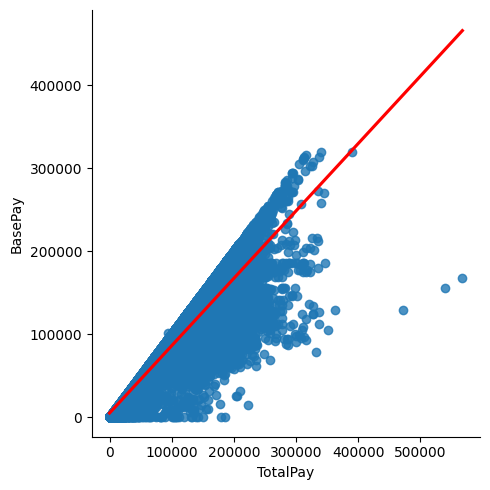

In [233]:
sns.lmplot(x='TotalPay',y='BasePay' , data = updated_df, line_kws={'color': 'red'})

## **7. Summary of Insights:**

Write a brief report summarizing the findings and insights from the analyses.

**There is a clear correlation between "salary" and "base pay", as the total salary increases as the base pay increases. There is also a correlation to a lesser degree with "benefits" and "other payments", as the average salary in general is $74,768 annually, and salaries In 2013, it was the highest compared to the rest of the years in our data.**

**We also note that about 60% of those for whom we have information about the departments in which they work, work within the Civil Crimes Department.**